In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('stock_price.csv')
df

,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%
...,...,...,...,...,...,...,...
9197,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%
9198,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%
9199,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%
9200,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%


### 探索的データ分析 (EDA)

In [3]:
# Renaming the columns to English for consistency
df.columns = ['Date', 'Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Volume', 'Percentage Change']

# Converting 'Volume' values properly from strings with 'M' and 'B' to numerical values
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace('M', '')) * 1e6 if isinstance(x, str) and 'M' in x
                                  else float(x.replace('B', '')) * 1e9 if isinstance(x, str) and 'B' in x
                                  else float(x))


df

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change
0,2024-08-01,156.3,159.3,159.4,156.1,7.915000e+07,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,1.739100e+08,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,1.381400e+08,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,1.262800e+08,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,1.550800e+08,-0.13%
...,...,...,...,...,...,...,...
9197,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82%
9198,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93%
9199,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74%
9200,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-5.43%


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

df['Percentage Change'] = df['Percentage Change'].astype(str).str.replace('%', '').astype(float)
df

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change
0,2024-08-01,156.3,159.3,159.4,156.1,7.915000e+07,-2.56
1,2024-07-31,160.4,158.2,160.7,158.1,1.739100e+08,1.07
2,2024-07-30,158.7,158.8,159.2,158.0,1.381400e+08,-0.63
3,2024-07-29,159.7,158.7,160.2,158.4,1.262800e+08,1.14
4,2024-07-26,157.9,159.3,159.6,157.9,1.550800e+08,-0.13
...,...,...,...,...,...,...,...
9197,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82
9198,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93
9199,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74
9200,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-5.43


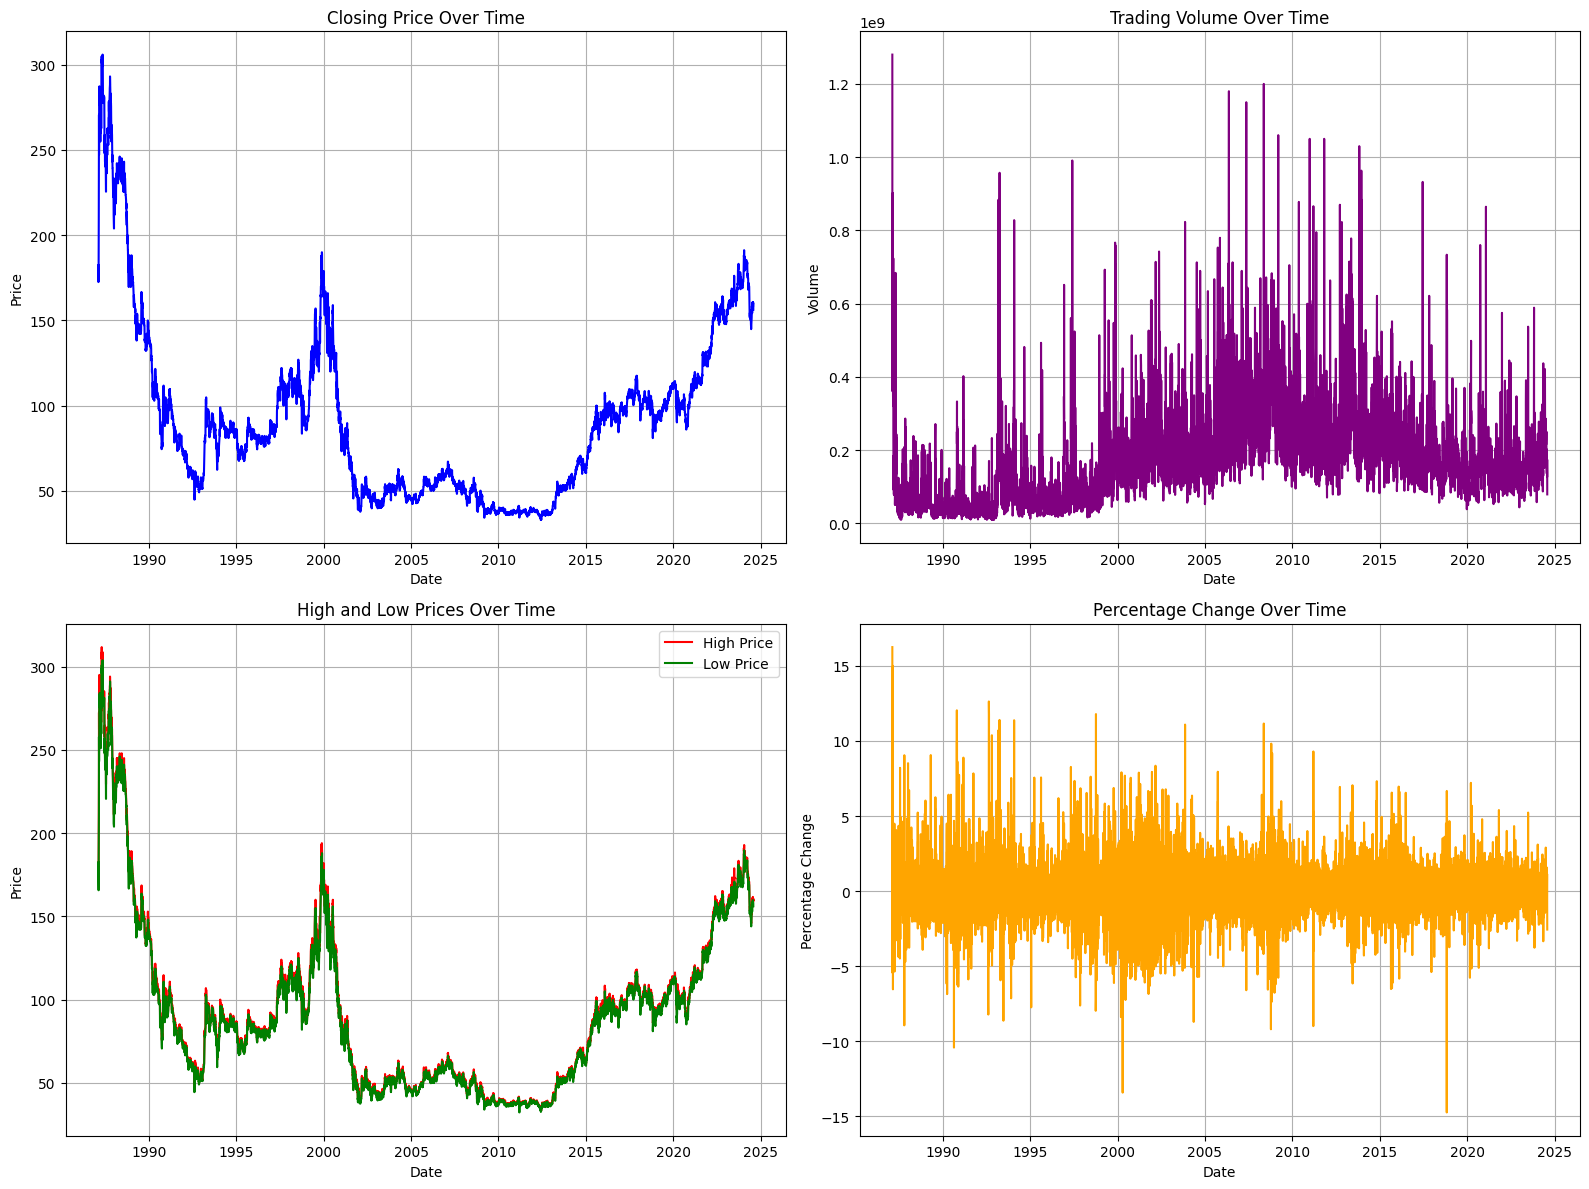

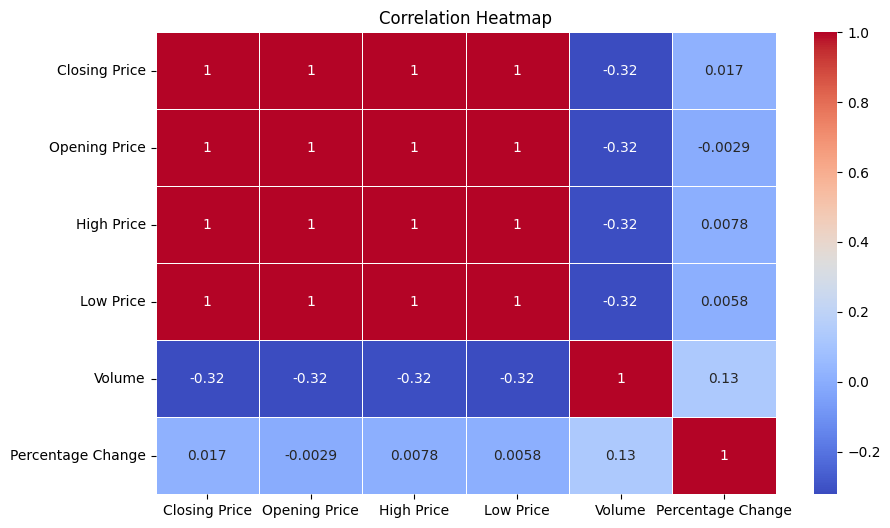

In [5]:
import seaborn as sns
# Visualizations for EDA
plt.figure(figsize=(16, 12))

# Plotting the closing price over time
plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Closing Price'], color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Plotting the volume over time
plt.subplot(2, 2, 2)
plt.plot(df['Date'], df['Volume'], color='purple')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)

# Plotting high and low prices over time
plt.subplot(2, 2, 3)
plt.plot(df['Date'], df['High Price'], label='High Price', color='red')
plt.plot(df['Date'], df['Low Price'], label='Low Price', color='green')
plt.title('High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plotting percentage change over time
plt.subplot(2, 2, 4)
plt.plot(df['Date'], df['Percentage Change'], color='orange')
plt.title('Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)

plt.tight_layout()
plt.show()

# Displaying a correlation heatmap for numerical columns
plt.figure(figsize=(10, 6))
corr = df[['Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Volume', 'Percentage Change']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


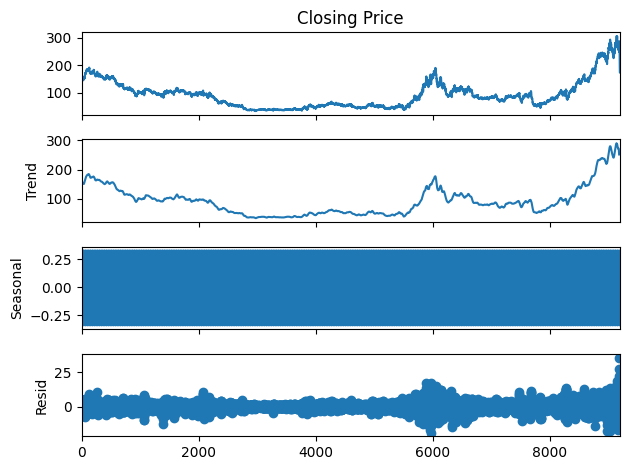

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Closing Price'], model='additive', period=30)  # assuming monthly seasonality

fig = decomposition.plot()
plt.show()

In [7]:
# Code to count null values in each column
null_counts = df.isnull().sum()

# Display the null counts for each column
print(null_counts)


Date                 0
Closing Price        0
Opening Price        0
High Price           0
Low Price            0
Volume               0
Percentage Change    0
dtype: int64


###特徴量エンジニアリング (Feature Engineering)

In [8]:
import pandas as pd

# Ensure the data is sorted by date for accurate feature calculation
df = df.sort_values(by='Date')

# Feature 1: Moving Averages (7-day and 30-day moving averages for the closing price)
df['MA_7'] = df['Closing Price'].rolling(window=7).mean()
df['MA_30'] = df['Closing Price'].rolling(window=30).mean()

# Feature 2: Exponential Moving Average (EMA) for the closing price (12-day)
df['EMA_12'] = df['Closing Price'].ewm(span=12, adjust=False).mean()

# Feature 3: Rolling Standard Deviation (volatility) of the closing price (7-day and 30-day windows)
df['Volatility_7'] = df['Closing Price'].rolling(window=7).std()
df['Volatility_30'] = df['Closing Price'].rolling(window=30).std()

for lag in range(1, 4):
    df[f'Lag_{lag}'] = df['Closing Price'].shift(lag)

# Feature 4: Relative Price Change
df['Price Change'] = df['Closing Price'].pct_change() * 100  # Daily percentage change in price

# Feature 5: Difference between high and low prices (price range)
df['Price Range'] = df['High Price'] - df['Low Price']

# Feature 6: Volume change (percentage change in trading volume)
df['Volume Change'] = df['Volume'].pct_change() * 100

# Feature 7: Ratio of closing price to volume (price per volume unit)
df['Price/Volume'] = df['Closing Price'] / df['Volume']

# Dropping rows with NaN values generated due to rolling operations
df = df.dropna().reset_index(drop=True)

# Display the updated DataFrame with new features
df


,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change,MA_7,MA_30,EMA_12,Volatility_7,Volatility_30,Lag_1,Lag_2,Lag_3,Price Change,Price Range,Volume Change,Price/Volume
0,1987-03-25,254.9,255.9,256.9,252.9,128840000.0,-0.78,264.014286,249.910000,264.872051,8.695675,37.751103,256.9,260.8,259.8,-0.778513,4.0,66.718427,1.978423e-06
1,1987-03-26,262.7,258.8,264.7,255.9,157060000.0,3.06,261.900000,252.586667,264.537890,6.354264,35.583934,254.9,256.9,260.8,3.060024,8.8,21.903136,1.672609e-06
2,1987-03-27,274.5,267.6,284.3,263.7,396150000.0,4.49,261.900000,255.986667,266.070522,6.354264,32.398273,262.7,254.9,256.9,4.491816,20.6,152.228448,6.929193e-07
3,1987-03-30,259.8,277.5,279.4,257.8,93750000.0,-5.36,261.342857,258.796667,265.105826,6.341098,28.611156,274.5,262.7,254.9,-5.355191,21.6,-76.334722,2.771200e-06
4,1987-03-31,265.7,252.0,274.5,251.0,119490000.0,2.27,262.185714,261.573333,265.197238,6.492156,24.718595,259.8,274.5,262.7,2.270978,23.5,27.456000,2.223617e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9168,2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.13,159.271429,154.456667,158.299967,1.203764,5.279804,158.1,158.5,160.7,-0.126502,1.7,-18.644423,1.018184e-06
9169,2024-07-29,159.7,158.7,160.2,158.4,126280000.0,1.14,159.114286,154.896667,158.515356,1.030257,5.142084,157.9,158.1,158.5,1.139962,1.8,-18.571060,1.264650e-06
9170,2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.63,159.071429,155.356667,158.543763,1.041976,4.824412,159.7,157.9,158.1,-0.626174,1.2,9.391828,1.148835e-06
9171,2024-07-31,160.4,158.2,160.7,158.1,173910000.0,1.07,159.142857,155.853333,158.829338,1.122285,4.532848,158.7,159.7,157.9,1.071204,2.6,25.894021,9.223161e-07


### 最適なアルゴリズムを決定するためのテスト (Tests to decide optimal algorithm)

1. 拡張ディッキー・フラー 検定 (Augmented Dickey-Fuller (ADF) Test)

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Closing Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.9182984423024236
p-value: 0.0019042324766376522
Critical Values:
	1%: -3.431064565728842
	5%: -2.861855792332081
	10%: -2.566938091201703


2. 自己相関関数 (ACF) および偏自己相関関数 (PACF) (Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF))

<Figure size 1200x600 with 0 Axes>

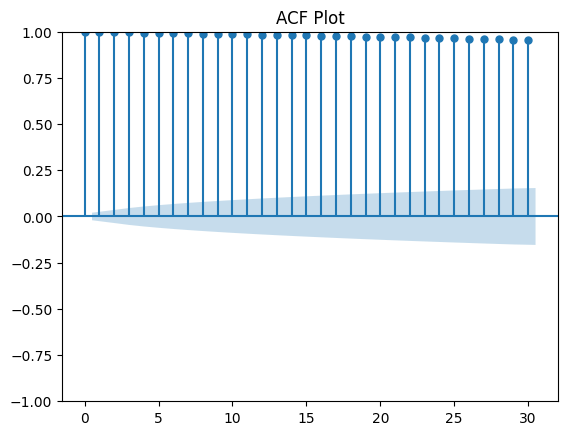

<Figure size 1200x600 with 0 Axes>

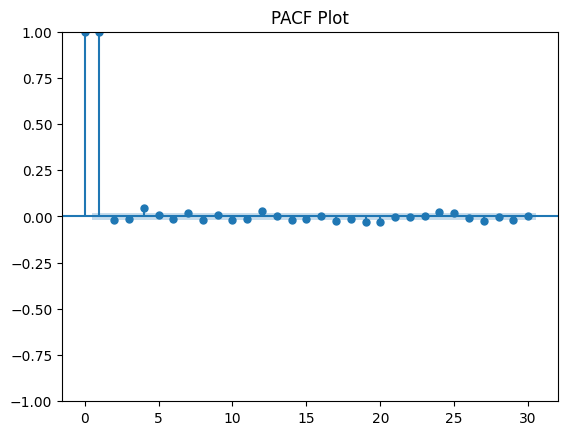

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(df['Closing Price'], lags=30)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Closing Price'], lags=30)
plt.title('PACF Plot')
plt.show()


3. 赤池情報量規準（AIC）およびベイズ情報量規準（BIC）(Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Closing Price'], order=(1, 1, 1))  # Example ARIMA(p, d, q) model
result = model.fit()
print('AIC:', result.aic)
print('BIC:', result.bic)


AIC: 37527.11553416406
BIC: 37548.487266095995


4. ARCH（自己回帰型条件付き異分散性）検定 (ARCH (Autoregressive Conditional Heteroskedasticity) Test))

In [ ]:
from statsmodels.stats.diagnostic import het_arch

test_result = het_arch(df['Closing Price'])
print('p-value:', test_result[1])


p-value: 0.0


トレンド分析 (Trend Analysis)

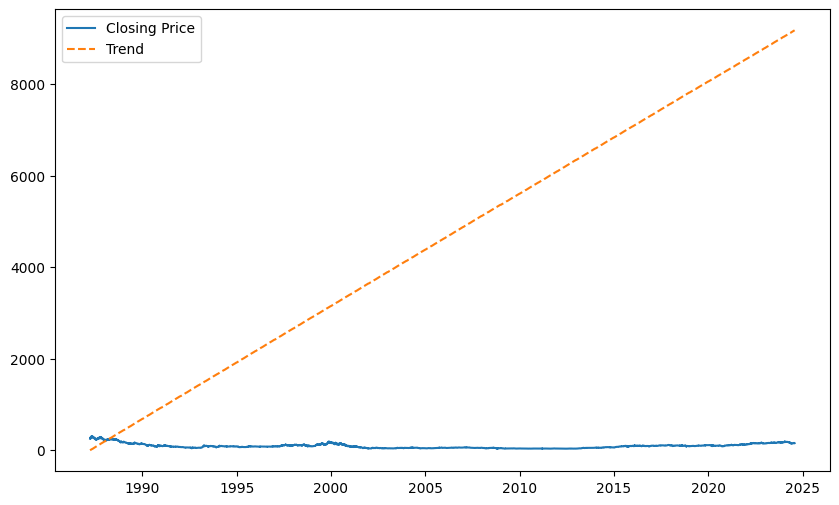

In [ ]:
import numpy as np

df['Trend'] = np.arange(len(df))
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Closing Price'], label='Closing Price')
plt.plot(df['Date'], df['Trend'], label='Trend', linestyle='--')
plt.legend()
plt.show()


テストからの推論: 結果は、ADFテストによって示されるように、時系列がわずかに定常であることを示しており、p値は5%の有意水準をわずかに下回っています。ACFおよびPACFプロットは強い自己相関構造を示しており、初期のARIMAモデルにはAR(1)成分が適切であることを示唆しています。ただし、トレンド分析では、線形トレンドと終値の実際の挙動に違いがあることが示されており、正確なモデリングのためにはデトレンドや差分化が必要かもしれません。AICおよびBIC値はモデル比較の基準を提供し、適合を最適化するためにさらなる調整や季節成分が必要な場合があります。異分散性テスト（ARCH）は有意なボラティリティクラスタリングを示しており、時間変動するボラティリティに対応するためにGARCHモデルを検討する必要があることを示しています。全体として、ARIMAモデルにGARCH成分を組み合わせ、観測された定常性およびボラティリティパターンに基づいてさらに調整することが適切であると思われます。

Inference from the tests:
The results indicate that the time series is marginally stationary, as suggested by the ADF test, with a p-value slightly below the 5% significance level. The ACF and PACF plots reveal a strong autocorrelation structure, suggesting an AR(1) component would be appropriate for an initial ARIMA model. However, the trend analysis shows a discrepancy between the linear trend and the actual behavior of the closing prices, indicating that detrending or differencing may be necessary for accurate modeling. The AIC and BIC values provide a baseline for comparing models, and further tuning or seasonal components may be required to optimize the fit. The heteroscedasticity test (ARCH) reveals significant volatility clustering, implying that a GARCH model should be considered to address time-varying volatility. Overall, an ARIMA model, potentially combined with a GARCH component, appears suitable, with further adjustments based on stationarity and volatility patterns observed.

###ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Splitting the main data into train (80%) and test (20%) sets without shuffling to maintain time series order
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the ARIMA model order (AR=1, I=1, MA=1) as a starting point
model_order = (1, 1, 1)

# Selecting the lag features as exogenous variables
exogenous_features = ['Lag_1', 'Lag_2', 'Lag_3']

# Fit the ARIMA model using the closing price as the target and lag features as predictors on the training data
arima_model = ARIMA(train_data['Closing Price'], exog=train_data[exogenous_features], order=model_order)
arima_result = arima_model.fit()

# Using the fitted model to make predictions on the test set
test_exogenous_features = test_data[exogenous_features]
test_predictions = arima_result.predict(start=test_data.index[0], end=test_data.index[-1], exog=test_exogenous_features)

# Calculate performance metrics
mse = mean_squared_error(test_data['Closing Price'], test_predictions)
mae = mean_absolute_error(test_data['Closing Price'], test_predictions)
rmse = np.sqrt(mse)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 31.19810328658924
Mean Squared Error (MSE): 1979.820865422691
Root Mean Squared Error (RMSE): 44.49517800192164


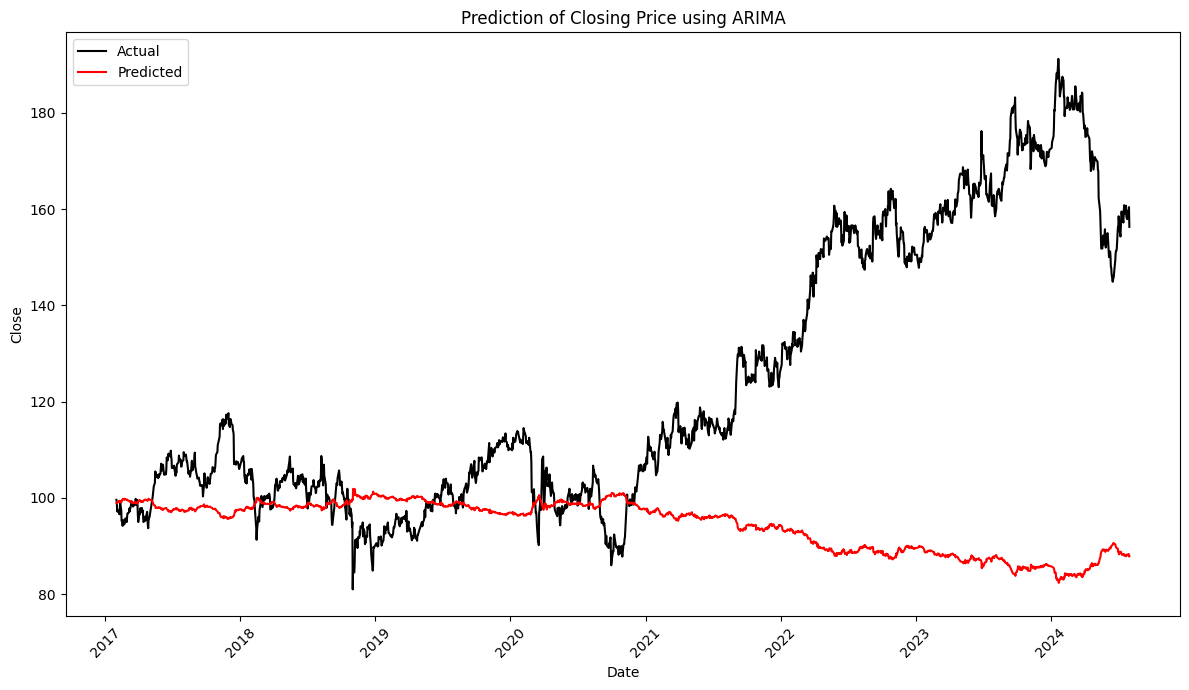

In [ ]:
import matplotlib.pyplot as plt

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract dates from the test set for accurate alignment
test_dates = test_data['Date']

# Plotting the actual vs predicted values with modifications for clarity
plt.figure(figsize=(12, 7))
plt.plot(test_dates, test_data['Closing Price'], label='Actual', color='black')
plt.plot(test_dates, test_predictions, label='Predicted', color='red')
plt.title('Prediction of Closing Price using ARIMA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Improving the model order based on the test results

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Splitting the main data into train (80%) and test (20%) sets without shuffling to maintain time series order
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the ARIMA model order (AR=1, I=1, MA=1) as a starting point
model_order = (6, 0, 0)

# Selecting the lag features as exogenous variables
exogenous_features = ['Lag_1', 'Lag_2', 'Lag_3']

# Fit the ARIMA model using the closing price as the target and lag features as predictors on the training data
arima_model = ARIMA(train_data['Closing Price'], exog=train_data[exogenous_features], order=model_order)
arima_result = arima_model.fit()

# Using the fitted model to make predictions on the test set
test_exogenous_features = test_data[exogenous_features]
test_predictions = arima_result.predict(start=test_data.index[0], end=test_data.index[-1], exog=test_exogenous_features)

# Calculate performance metrics
mse = mean_squared_error(test_data['Closing Price'], test_predictions)
mae = mean_absolute_error(test_data['Closing Price'], test_predictions)
rmse = np.sqrt(mse)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.0967758363761413
Mean Squared Error (MSE): 2.301556268040985
Root Mean Squared Error (RMSE): 1.5170880884249882


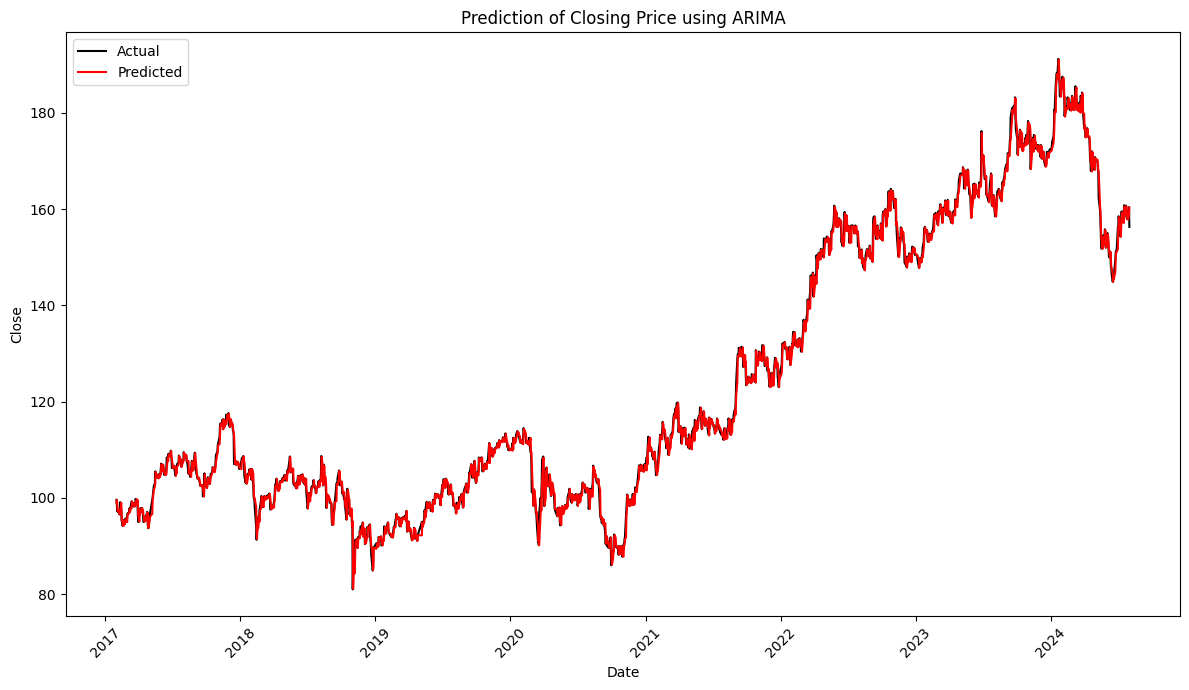

In [ ]:
import matplotlib.pyplot as plt

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract dates from the test set for accurate alignment
test_dates = test_data['Date']

# Plotting the actual vs predicted values with modifications for clarity
plt.figure(figsize=(12, 7))
plt.plot(test_dates, test_data['Closing Price'], label='Actual', color='black')
plt.plot(test_dates, test_predictions, label='Predicted', color='red')
plt.title('Prediction of Closing Price using ARIMA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###LSTM

学習率の決定 (Determining the learning rate)

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assume df contains your dataset with a 'Closing Price' column
# Reshape the values
values = df['Closing Price'].values.reshape(-1, 1)

# Create a Scaler Object
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler and transform the values
normalized_values = scaler.fit_transform(values)

# Split the data into train (70%), validation (15%), and test (15%) sets
train_size = int(len(normalized_values) * 0.7)
valid_size = int(len(normalized_values) * 0.15)

x_train = normalized_values[:train_size]
x_valid = normalized_values[train_size:train_size + valid_size]
x_test = normalized_values[train_size + valid_size:]

# Function to create sequences for LSTM input
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Set the window size
window_size = 20

# Create train sequences
X_train, y_train = create_sequences(x_train, window_size)

# Reshape input data for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model using an Input layer
model = keras.models.Sequential([
    keras.layers.Input(shape=(window_size, 1)),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(100),
    keras.layers.Dense(1)
])

# Create learning rate schedule
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 20))

# Compile the model
optimizer = keras.optimizers.Nadam(learning_rate=1e-5)
model.compile(loss=keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])

# Train the model to find the optimal learning rate
history = model.fit(X_train, y_train, epochs=20, batch_size=1, callbacks=[lr_schedule], verbose=1)

Epoch 1/20
6401/6401 ━━━━━━━━━━━━━━━━━━━━ 183s 28ms/step - loss: 0.0098 - mae: 0.0709 - learning_rate: 1.0000e-05
Epoch 2/20
6401/6401 ━━━━━━━━━━━━━━━━━━━━ 174s 27ms/step - loss: 1.9520e-04 - mae: 0.0128 - learning_rate: 1.1220e-05
Epoch 3/20
6401/6401 ━━━━━━━━━━━━━━━━━━━━ 195s 26ms/step - loss: 1.5239e-04 - mae: 0.0113 - learning_rate: 1.2589e-05
Epoch 4/20
6401/6401 ━━━━━━━━━━━━━━━━━━━━ 209s 27ms/step - loss: 1.3892e-04 - mae: 0.0106 - learning_rate: 1.4125e-05
Epoch 5/20
6401/6401 ━━━━━━━━━━━━━━━━━━━━ 179s 28ms/step - loss: 1.1233e-04 - mae: 0.0097 - learning_rate: 1.5849e-05
Epoch 6/20
6401/6401 ━━━━━━━━━━━━━━━━━━━━ 201s 28ms/step - loss: 1.0573e-04 - mae: 0.0092 - learning_rate: 1.7783e-05
Epoch 7/20
6401/6401 ━━━━━━━━━━━━━━━━━━━━ 203s 28ms/step - loss: 8.6914e-05 - mae: 0.0086 - learning_rate: 1.9953e-05
Epoch 8/20
6401/6401 ━━━━━━━━━━━━━━━━━━━━ 190s 26ms/step - loss: 8.5289e-05 - mae: 0.0084 - learning_rate: 2.2387e-05
Epoch 9/20
6401/6401 ━━━━━━━━━━━━━━━━━━━━ 167s 26ms/step - l

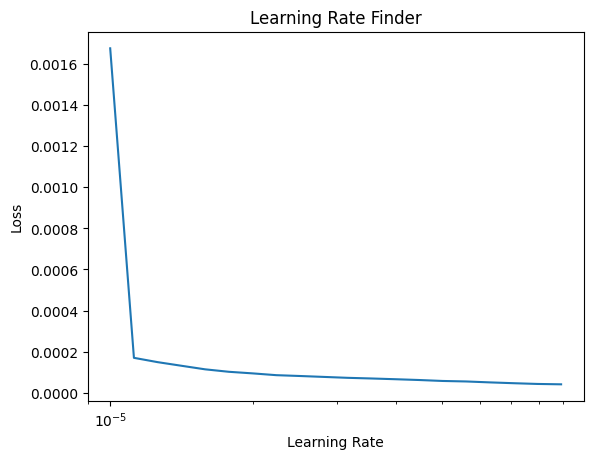

In [ ]:
# Plot the learning rate vs loss to find the optimal learning rate
plt.semilogx(history.history['learning_rate'], history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate Finder")
plt.show()

最適な学習率を使用してモデルを訓練 (Training the Model Using the Optimal Learning Rate)

In [ ]:
# Reset the session and seeds for reproducibility
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Set the optimal learning rate found from the plot
optimal_lr = 1e-4

# Create train, validation, and test sequences
X_train, y_train = create_sequences(x_train, window_size)
X_valid, y_valid = create_sequences(x_valid, window_size)
X_test, y_test = create_sequences(x_test, window_size)

# Reshape input data for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model using an Input layer
model = keras.models.Sequential([
    keras.layers.Input(shape=(window_size, 1)),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(100),
    keras.layers.Dense(1)
])

# Compile the model using the optimal learning rate
optimizer = keras.optimizers.Nadam(learning_rate=optimal_lr)
model.compile(loss=keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])

# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping], verbose=1)

# Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to get the original scale
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

Epoch 1/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0091 - mae: 0.0736 - val_loss: 9.5664e-05 - val_mae: 0.0109
Epoch 2/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 1.8009e-04 - mae: 0.0128 - val_loss: 7.4553e-05 - val_mae: 0.0095
Epoch 3/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 1.5945e-04 - mae: 0.0116 - val_loss: 6.8087e-05 - val_mae: 0.0090
Epoch 4/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 1.5290e-04 - mae: 0.0112 - val_loss: 6.4069e-05 - val_mae: 0.0087
Epoch 5/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 1.4694e-04 - mae: 0.0110 - val_loss: 6.0383e-05 - val_mae: 0.0084
Epoch 6/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 1.4070e-04 - mae: 0.0107 - val_loss: 5.6862e-05 - val_mae: 0.0081
Epoch 7/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 1.3429e-04 - mae: 0.0105 - val_loss: 5.3596e-05 - val_mae: 0.0078
Epoch 8/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 1.2778e-04 - mae: 0.0102 - val_loss: 5.0691e

モデルの評価 (Evaluating the Model)

Mean Absolute Error (MAE): 1.7504556328387686
Mean Squared Error (MSE): 4.597316872985804
Root Mean Squared Error (RMSE): 2.1441354605028584


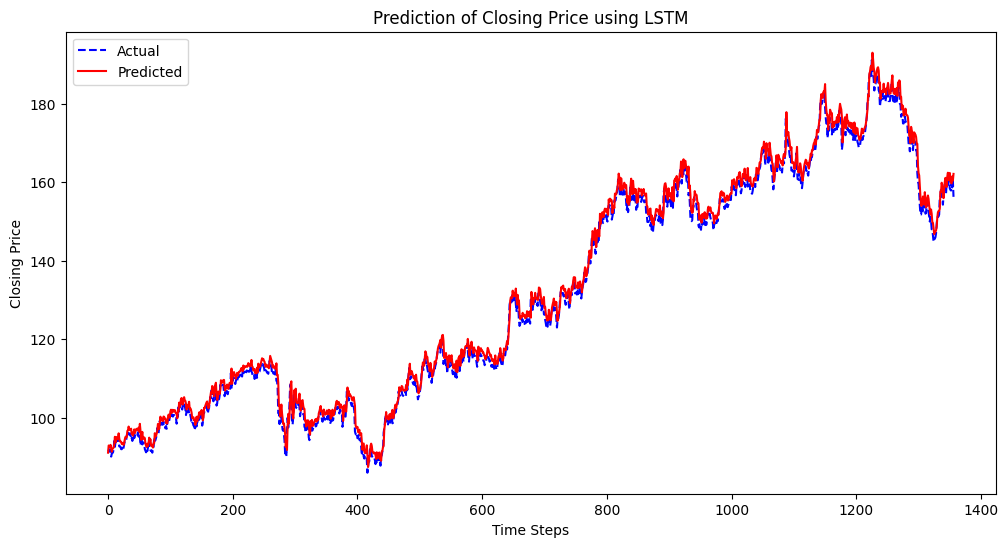

In [ ]:
# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual", color="blue", linestyle="--")
plt.plot(y_pred_inv, label="Predicted", color="red")
plt.title("Prediction of Closing Price using LSTM")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.legend()
plt.show()